In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "data.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [4]:
df.shape

(45211, 20)

In [5]:
df.columns

Index(['Customer_number', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender', 'Sno', 'Insurance', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'last_contact_day',
       'previous', 'poutcome', 'Term Deposit', 'Count_Txn'],
      dtype='object')

In [6]:
df.dtypes

Customer_number       int64
age                   int64
job                  object
marital              object
education            object
Annual Income        object
Gender               object
Sno                   int64
Insurance            object
balance              object
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
dtype: object

# 1. Income Insights:# 	How many customers have no annual income? Plot and present the data distribution of these customers.


Number of customers with no annual income: 17


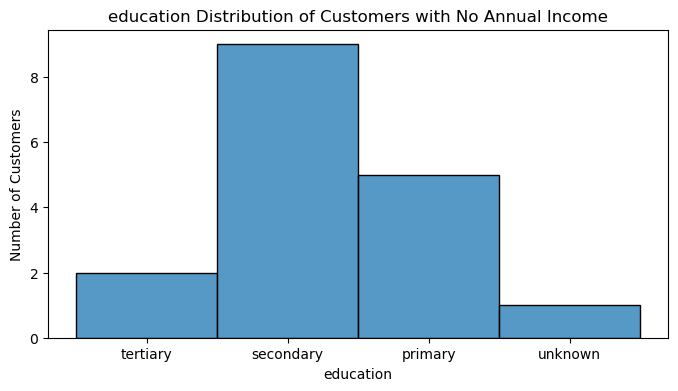

In [8]:
no_income_customers = df[df['Annual Income'].isnull()]

#Count the Number of Customers with No Annual Income
num_no_income_customers = no_income_customers.shape[0]
print(f'Number of customers with no annual income: {num_no_income_customers}')

#Plot the Data Distribution
plt.figure(figsize=(8, 4))
sns.histplot(no_income_customers['education'], bins=20, kde=False)
plt.title('education Distribution of Customers with No Annual Income')
plt.xlabel('education')
plt.ylabel('Number of Customers')
plt.show()

Number of customers with no annual income: 17


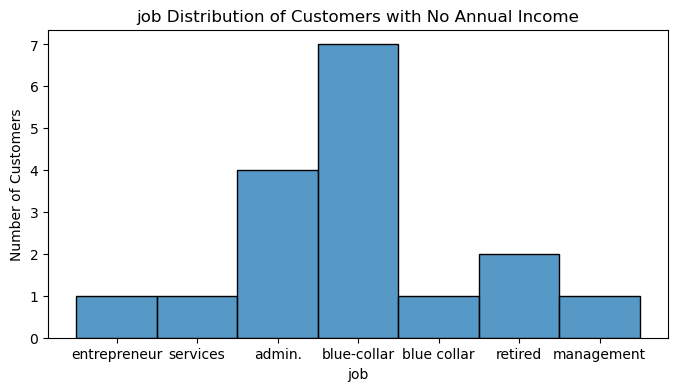

In [9]:
no_income_customers = df[df['Annual Income'].isnull()]

#Count the Number of Customers with No Annual Income
num_no_income_customers = no_income_customers.shape[0]
print(f'Number of customers with no annual income: {num_no_income_customers}')

#Plot the Data Distribution
plt.figure(figsize=(8, 4))
sns.histplot(no_income_customers['job'], bins=20, kde=False)
plt.title('job Distribution of Customers with No Annual Income')
plt.xlabel('job')
plt.ylabel('Number of Customers')
plt.show()

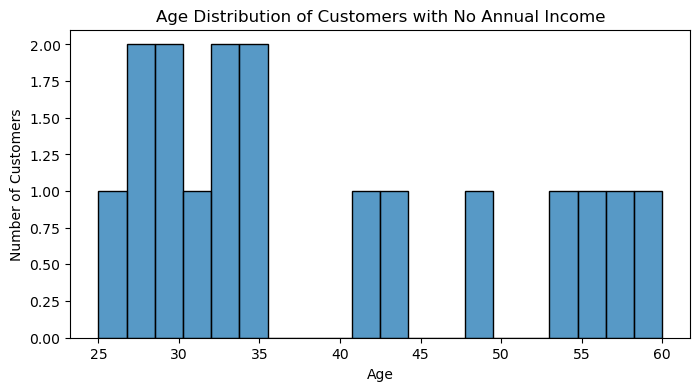

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(no_income_customers['age'], bins=20, kde=False)
plt.title('Age Distribution of Customers with No Annual Income')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 2. Loan-less Customers Profile:
# 	Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?


C:\Users\yarra\AppData\Local\Temp\ipykernel_36512\3458684255.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Annual Income'] = pd.to_numeric(df['Annual Income'].replace(['\\', '/'], np.nan), errors='coerce')
C:\Users\yarra\AppData\Local\Temp\ipykernel_36512\3458684255.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplac

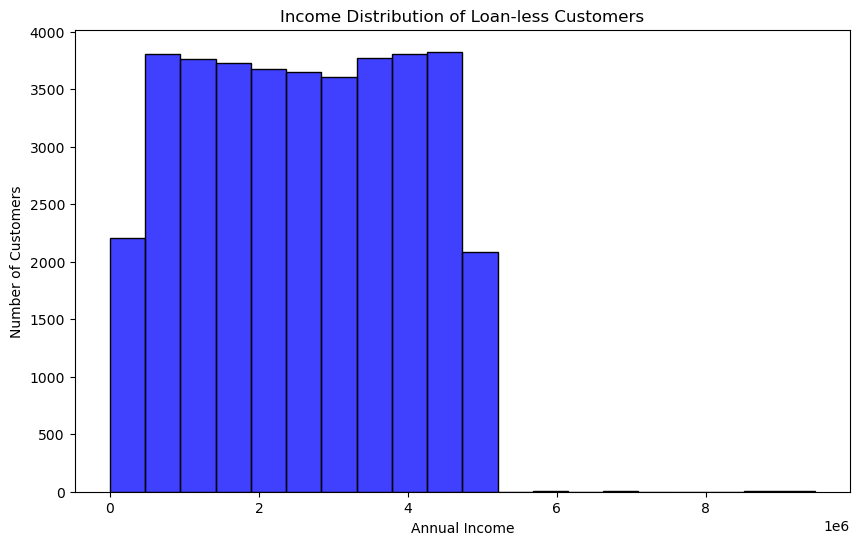

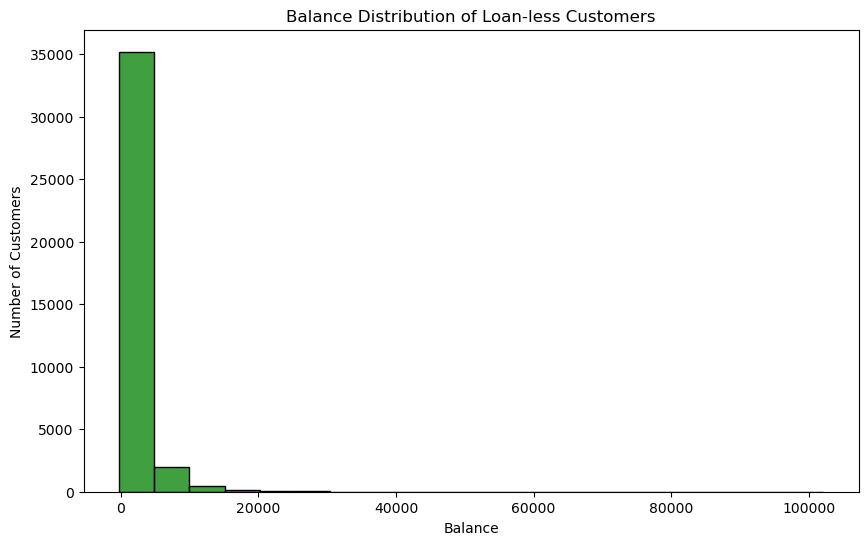

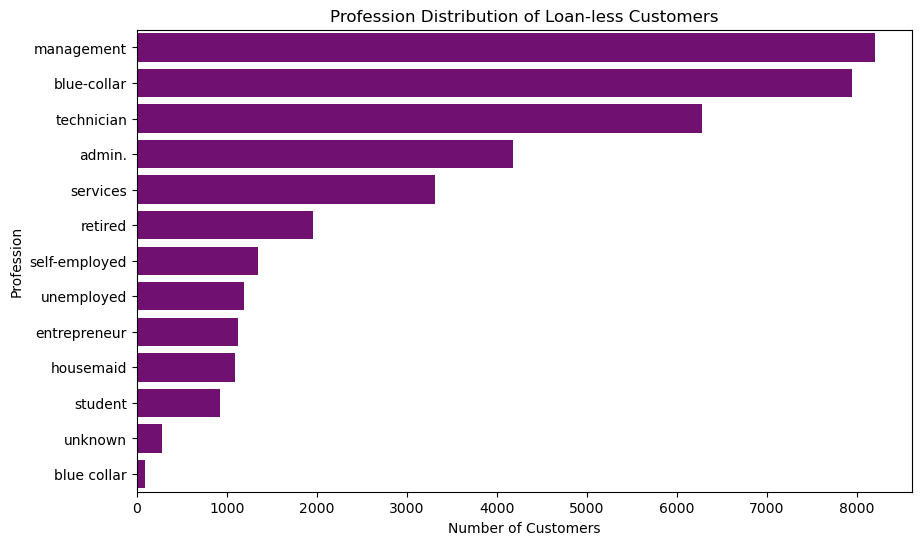

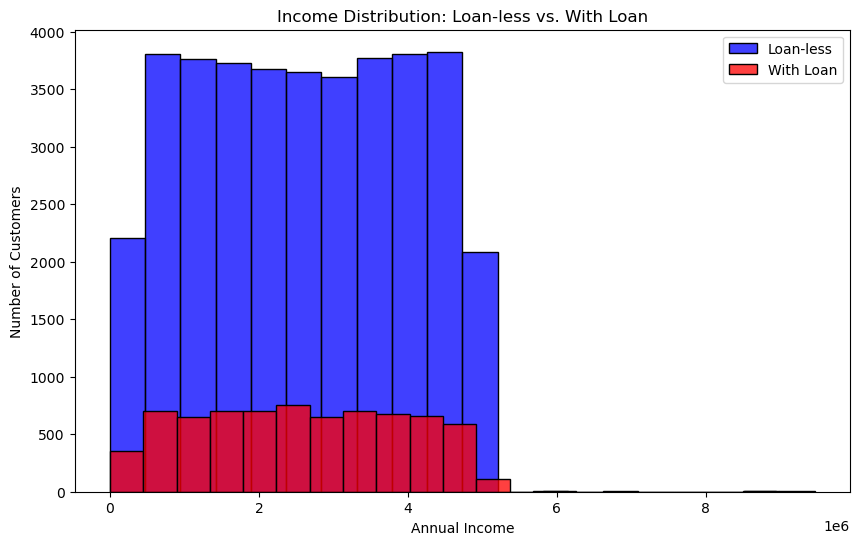

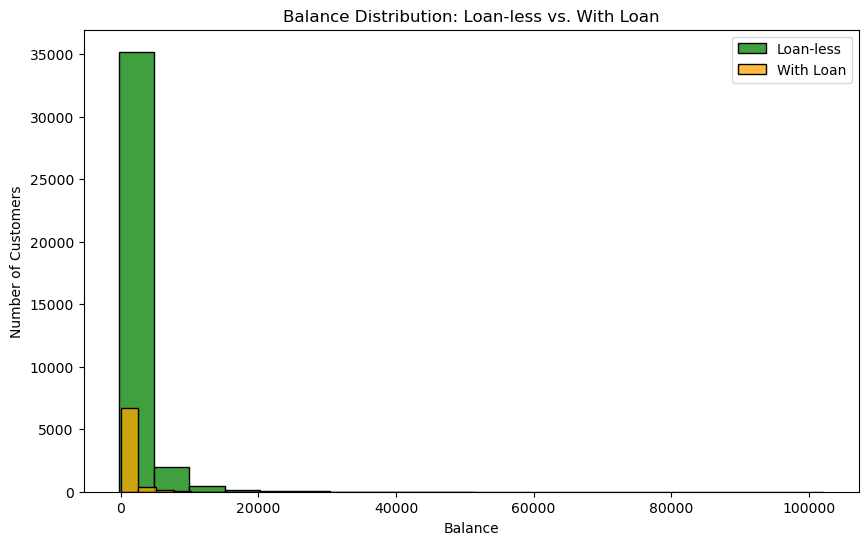

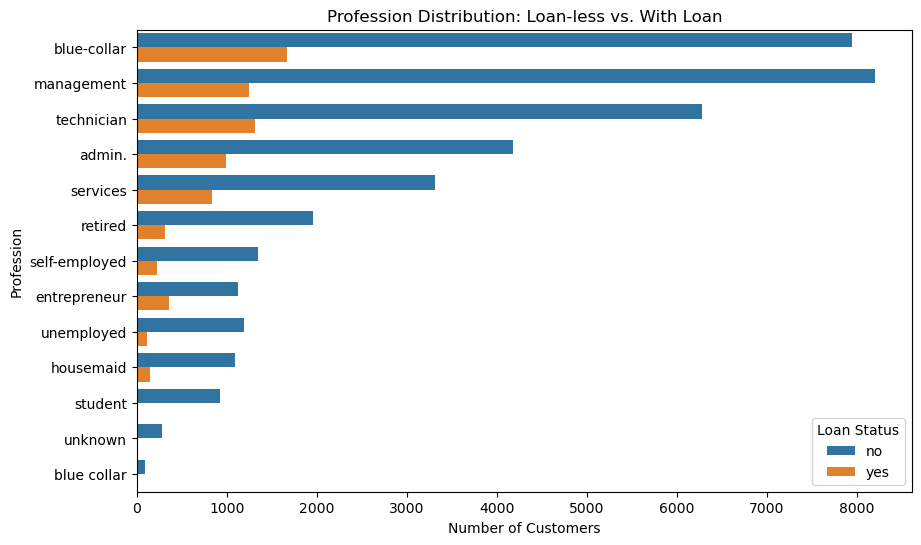

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Step 1: Clean the 'Annual Income' and 'balance' columns
df['Annual Income'] = pd.to_numeric(df['Annual Income'].replace(['\\', '/'], np.nan), errors='coerce')
df['balance'] = pd.to_numeric(df['balance'].replace(['\\', '/'], np.nan), errors='coerce')

# Replace NaN values with 0
df['Annual Income'].fillna(0, inplace=True)
df['balance'].fillna(0, inplace=True)

# Step 2: Filter customers who don't have any type of loan
loan_less_customers = df[df['loan'] == 'no']
loan_customers = df[df['loan'] == 'yes']

# Step 3: Plot the distributions for loan-less customers

# Income distribution for loan-less customers
plt.figure(figsize=(10, 6))
sns.histplot(loan_less_customers['Annual Income'], bins=20, kde=False, color='blue')
plt.title('Income Distribution of Loan-less Customers')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.show()

# Balance distribution for loan-less customers
plt.figure(figsize=(10, 6))
sns.histplot(loan_less_customers['balance'], bins=20, kde=False, color='green')
plt.title('Balance Distribution of Loan-less Customers')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.show()

# Profession distribution for loan-less customers
plt.figure(figsize=(10, 6))
sns.countplot(y=loan_less_customers['job'], order=loan_less_customers['job'].value_counts().index, color='purple')
plt.title('Profession Distribution of Loan-less Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Profession')
plt.show()

# Step 4: Compare with customers who have loans

# Income distribution comparison
plt.figure(figsize=(10, 6))
sns.histplot(loan_less_customers['Annual Income'], bins=20, kde=False, color='blue', label='Loan-less')
sns.histplot(loan_customers['Annual Income'], bins=20, kde=False, color='red', label='With Loan')
plt.title('Income Distribution: Loan-less vs. With Loan')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

# Balance distribution comparison
plt.figure(figsize=(10, 6))
sns.histplot(loan_less_customers['balance'], bins=20, kde=False, color='green', label='Loan-less')
sns.histplot(loan_customers['balance'], bins=20, kde=False, color='orange', label='With Loan')
plt.title('Balance Distribution: Loan-less vs. With Loan')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

# Profession distribution comparison
plt.figure(figsize=(10, 6))
sns.countplot(y=df['job'], hue=df['loan'], order=df['job'].value_counts().index)
plt.title('Profession Distribution: Loan-less vs. With Loan')
plt.xlabel('Number of Customers')
plt.ylabel('Profession')
plt.legend(title='Loan Status')
plt.show()


# 3 Loan and Insurance Analysis:# 	Calculate the percentage of customers with a loan who have taken out insurance. Visualize this data and discuss potential implications.


Percentage of customers with a loan who have taken out insurance: 4.16%


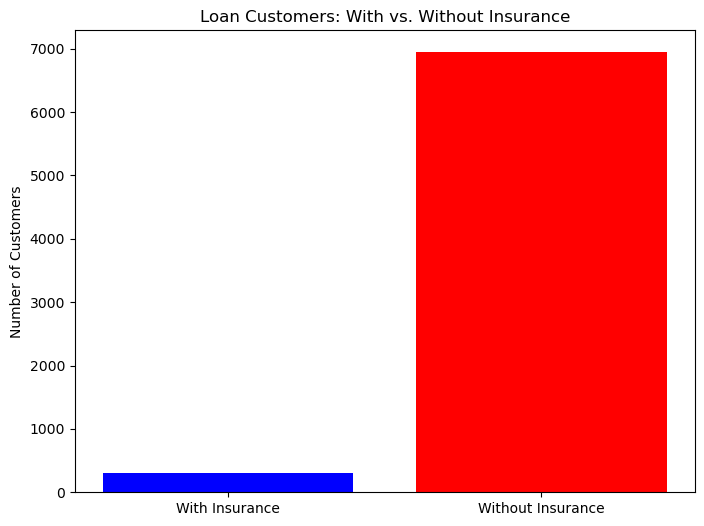

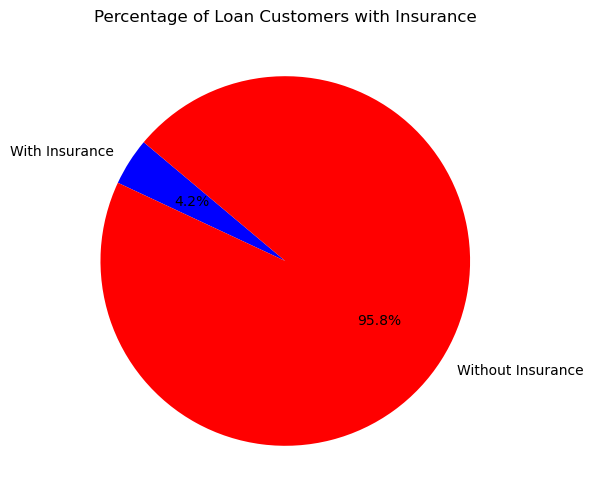

In [14]:
loan_customers = df[df['loan'] == 'yes']

#Calculate the percentage of customers with a loan who also have insurance
total_loan_customers = loan_customers.shape[0]
insurance_loan_customers = loan_customers[loan_customers['Insurance'] == 'yes'].shape[0]

# Percentage calculation
insurance_percentage = (insurance_loan_customers / total_loan_customers) * 100
print(f"Percentage of customers with a loan who have taken out insurance: {insurance_percentage:.2f}%")

#Visualize the data

# Data for visualization
data = {'With Insurance': insurance_loan_customers, 
        'Without Insurance': total_loan_customers - insurance_loan_customers}
categories = list(data.keys())
values = list(data.values())

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'red'])
plt.title('Loan Customers: With vs. Without Insurance')
plt.ylabel('Number of Customers')
plt.show()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Percentage of Loan Customers with Insurance')
plt.show()


## Discussion of Potential Implications:

### If many customers with loans also have insurance, it could mean they’re more aware of managing financial risks because they have extra liabilities. On the other hand, if few loan customers have insurance, the bank might see this as a chance to better promote insurance to them, as they might not be fully covered. Understanding this link helps the bank profile customers better and predict which groups might be more likely to buy insurance, allowing for more targeted marketing efforts.

# 4. Communication Strategy Insights:# 	Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.


In [27]:
df["contact"].value_counts()

contact
cellular     29282
unknown      12970
telephone     2850
Mobile          29
Tel             20
?               17
Name: count, dtype: int64

In [29]:
df['contact'] = df['contact'].replace({'Mobile': 'cellular', '0': 'unknown', 'Tel': 'telephone'})

In [31]:
df["contact"].value_counts()

contact
cellular     29311
unknown      12970
telephone     2870
?               17
Name: count, dtype: int64

In [33]:
df = df[df['Term Deposit'] != '0']

In [35]:
df['Term Deposit'] = df['Term Deposit'].replace({'yes': 1, 'no': 0})

C:\Users\yarra\AppData\Local\Temp\ipykernel_36512\1976732925.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Term Deposit'] = df['Term Deposit'].replace({'yes': 1, 'no': 0})


In [37]:
contact_success = df.groupby('contact').agg(total_contacts=('Term Deposit', 'size'),successful_subscriptions=('Term Deposit', 'sum'))

In [39]:
contact_success['success_percentage'] = (contact_success['successful_subscriptions'] / contact_success['total_contacts']) * 100

# Sort by success percentage
contact_success = contact_success.sort_values(by='success_percentage', ascending=False)

print(contact_success)

           total_contacts  successful_subscriptions  success_percentage
contact                                                                
cellular            29311                    4368.0           14.902255
telephone            2870                     389.0           13.554007
unknown             12970                     530.0            4.086353
?                      17                       0.0            0.000000


# 5. Age and Home Loans:# 	Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.
.

In [48]:
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify age groups
print(df[['age', 'age_group']].head())

   age age_group
0   58     56-65
1   44     36-45
2   33     26-35
3   47     46-55
4   33     26-35


In [50]:
# Filter the data for customers with home loans
home_loan_customers = df[df['loan'] == 'yes']

# Calculate the total number of customers in each age group
age_group_counts = df['age_group'].value_counts(sort=False)

# Calculate the number of customers with home loans in each age group
home_loan_counts = home_loan_customers['age_group'].value_counts(sort=False)

# Calculate the percentage of customers with home loans in each age group
home_loan_percentage = (home_loan_counts / age_group_counts) * 100

# Display the percentage of home loans by age group
print(home_loan_percentage)


age_group
18-25     9.888752
26-35    16.410870
36-45    15.597908
46-55    18.075919
56-65    15.543301
66-75     0.851064
76-85     0.000000
86-95     0.000000
Name: count, dtype: float64


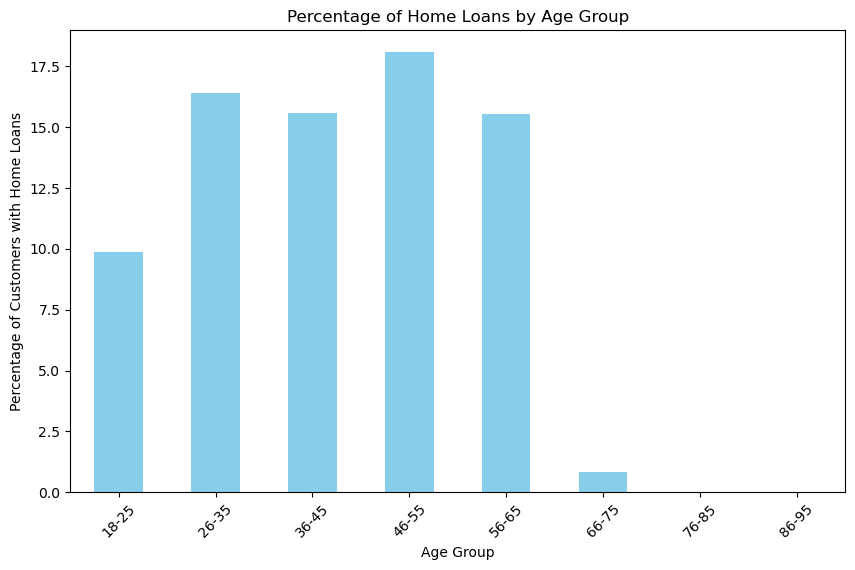

In [52]:
# Plot the percentage of home loans by age group
plt.figure(figsize=(10, 6))
home_loan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Customers with Home Loans')
plt.xticks(rotation=45)
plt.show()

# Discuss Possible Reasons

### Financial Stability: Middle-aged customers (e.g., 36-45 or 46-55) may have more stable incomes and are more likely to invest in homeownership.
### Life Stage: Younger customers (e.g., 18-25) might be less likely to take on home loans due to lower income levels or being early in their careers.
### Retirement Planning: Older age groups (e.g., 56-65) might have paid off their home loans or be less likely to take on new loans as they approach retirement.ent.

# 6. Income and Age Relationship:
# Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

In [57]:
print(df[['age', 'age_group', 'Annual Income']].head())

   age age_group  Annual Income
0   58     56-65       839368.0
1   44     36-45      1452858.0
2   33     26-35      4851383.0
3   47     46-55      3207754.0
4   33     26-35      2562322.0


In [59]:
print(df['Annual Income'].isna().sum())

0


In [61]:
df = df.dropna(subset=['Annual Income'])

In [69]:
income_stats = df.groupby('age_group', observed=False)['Annual Income'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

In [71]:
income_stats

,mean,median,std,min,max,count
age_group,,,,,,
18-25,2.586754e+06,2534373.0,1.463509e+06,201877.0,8940189.0,809
26-35,2.584233e+06,2571061.5,1.400132e+06,0.0,9456339.0,14204
36-45,2.611482e+06,2613594.5,1.388386e+06,0.0,9458762.0,14534
46-55,2.587862e+06,2579649.5,1.388787e+06,0.0,9456591.0,9958
56-65,2.607275e+06,2572239.5,1.397574e+06,0.0,9455395.0,4896
66-75,2.481441e+06,2424192.5,1.357040e+06,224655.0,4997059.0,470
76-85,2.634682e+06,2729391.5,1.356275e+06,222287.0,4984209.0,268
86-95,2.570384e+06,2448034.5,1.408508e+06,483495.0,4982933.0,30


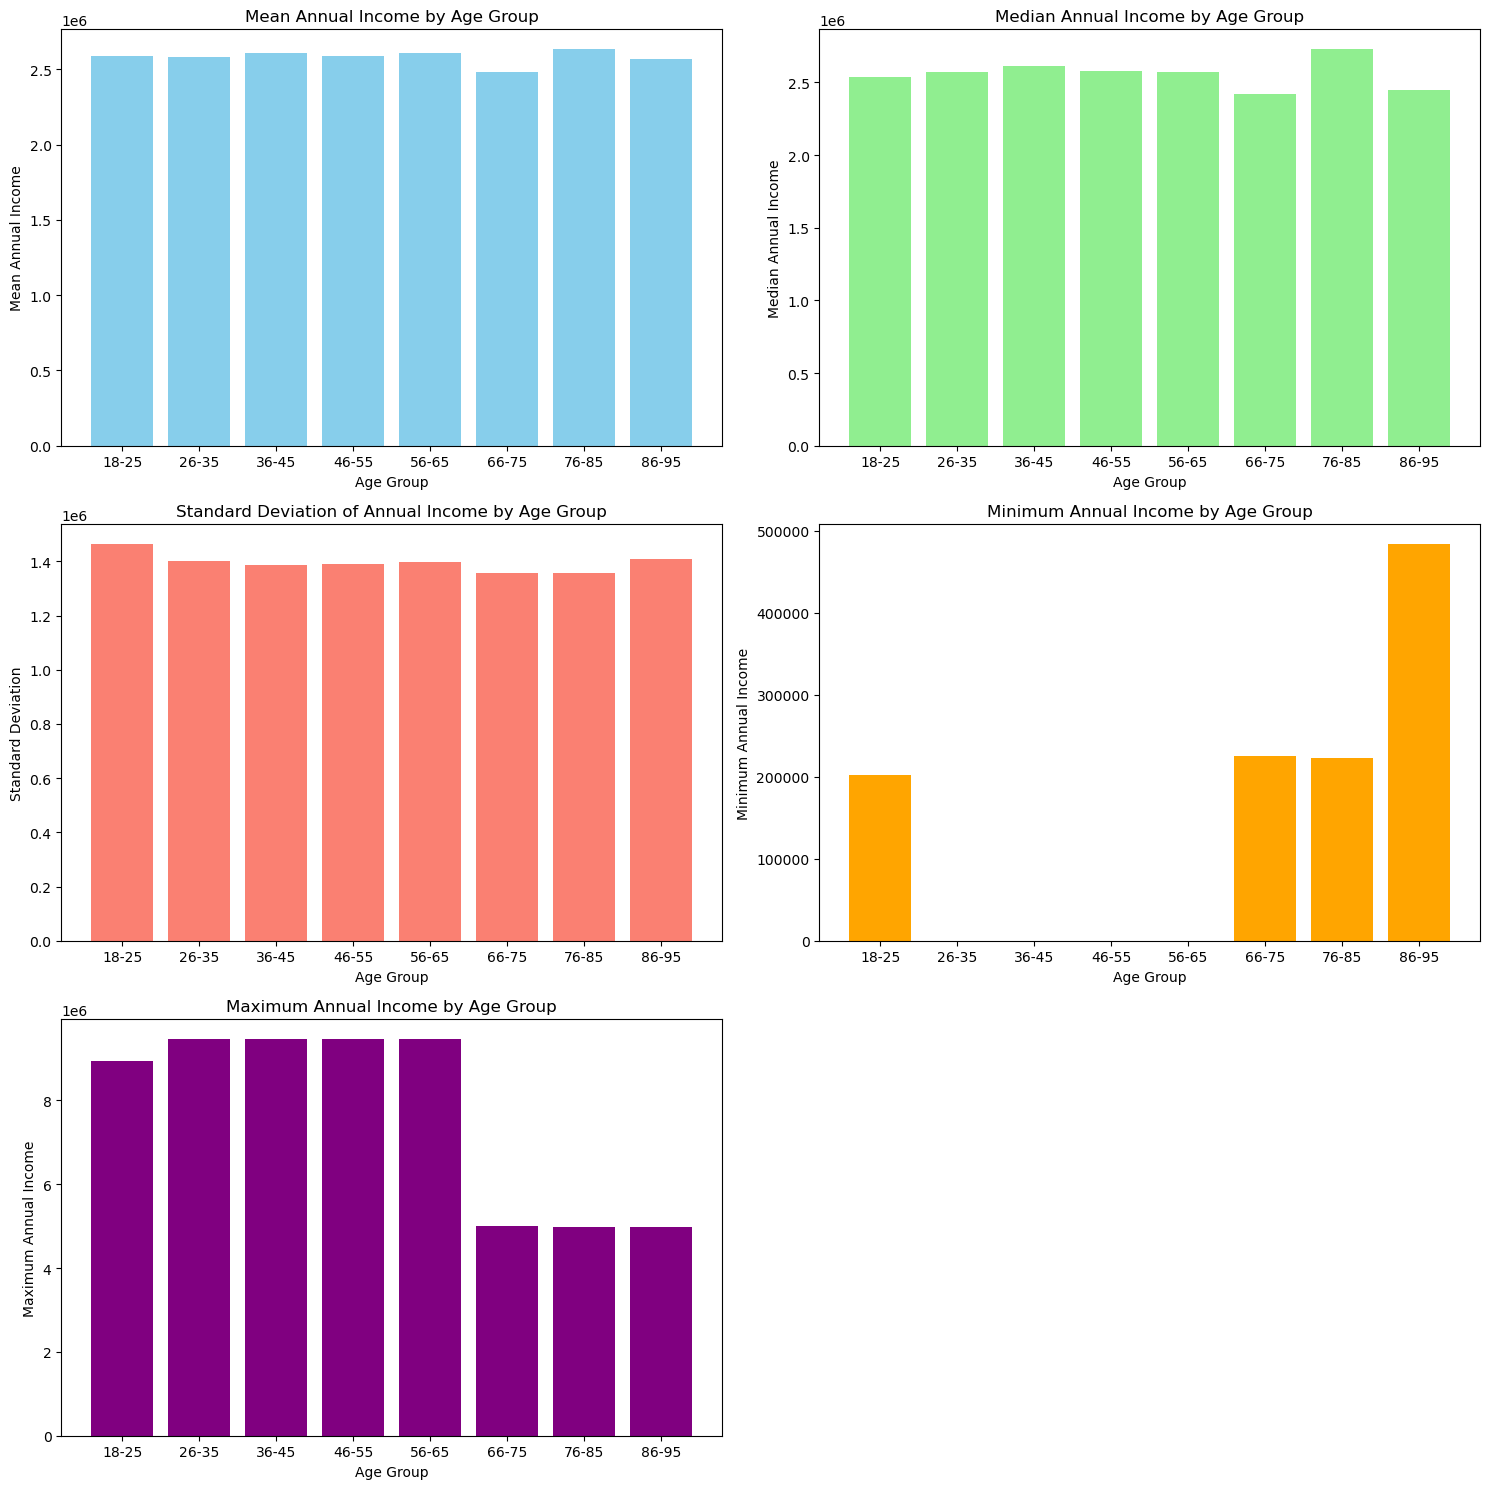

In [73]:

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot mean income
axs[0, 0].bar(income_stats.index, income_stats['mean'], color='skyblue')
axs[0, 0].set_title('Mean Annual Income by Age Group')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].set_ylabel('Mean Annual Income')

# Plot median income
axs[0, 1].bar(income_stats.index, income_stats['median'], color='lightgreen')
axs[0, 1].set_title('Median Annual Income by Age Group')
axs[0, 1].set_xlabel('Age Group')
axs[0, 1].set_ylabel('Median Annual Income')

# Plot standard deviation
axs[1, 0].bar(income_stats.index, income_stats['std'], color='salmon')
axs[1, 0].set_title('Standard Deviation of Annual Income by Age Group')
axs[1, 0].set_xlabel('Age Group')
axs[1, 0].set_ylabel('Standard Deviation')

# Plot minimum income
axs[1, 1].bar(income_stats.index, income_stats['min'], color='orange')
axs[1, 1].set_title('Minimum Annual Income by Age Group')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Minimum Annual Income')

# Plot maximum income
axs[2, 0].bar(income_stats.index, income_stats['max'], color='purple')
axs[2, 0].set_title('Maximum Annual Income by Age Group')
axs[2, 0].set_xlabel('Age Group')
axs[2, 0].set_ylabel('Maximum Annual Income')

# Remove the empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()
